In [1]:
import pandas as pd

C:\Users\mahis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [47]:
!pip install pandas

In [48]:
!pip install numpy

In [49]:
import pandas as pd
import numpy as np

In [50]:
df_sales_train=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\sales_train.csv")

In [51]:
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [52]:
df_sales_train.shape

(2935849, 6)

In [53]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [54]:
df_sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [55]:
df_sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [56]:
df_sales_train['date'].unique()

array(['02.01.2013', '03.01.2013', '05.01.2013', ..., '28.10.2015',
       '25.10.2015', '13.10.2015'], dtype=object)

In [57]:
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'], format='%d.%m.%Y')


In [58]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [59]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [60]:
df_sales_train['date'].max()

Timestamp('2015-10-31 00:00:00')

In [61]:
df_sales_train['date'].min()

Timestamp('2013-01-01 00:00:00')

In [62]:
df_sales_train.nunique()

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

In [63]:
df_sales_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [64]:
df_sales_train[df_sales_train['date']=='2013-01-01 00:00:00']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
7554,2013-01-01,0,19,18976,399.0,1.0
7644,2013-01-01,0,19,18284,199.0,1.0
7646,2013-01-01,0,19,18320,199.0,1.0
7647,2013-01-01,0,19,18329,299.0,1.0
7694,2013-01-01,0,19,19367,399.0,1.0
...,...,...,...,...,...,...
115353,2013-01-01,0,46,1481,1999.0,2.0
115365,2013-01-01,0,46,1837,1999.0,1.0
115446,2013-01-01,0,46,1916,249.0,1.0
115473,2013-01-01,0,46,1956,399.0,1.0


In [65]:
df_sample_submission=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\sample_submission.csv")

In [66]:
df_sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [67]:
df_sample_submission.shape

(214200, 2)

In [71]:
df_items2=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\items2.csv")

In [91]:
df_items2.head()

,item_name,item_id,item_category_id,item_name.1
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Item_00001
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Item_00002
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Item_00003
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Item_00004
4,***КОРОБКА (СТЕКЛО) D,4,40,Item_00005


In [73]:
df_items.shape

(22170, 4)

In [74]:
df_items.nunique()

item_name           22170
item_id             22170
item_category_id       84
item_name.1         22170
dtype: int64

In [75]:
df_item_category2=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\item_category2.csv")

In [76]:
df_item_category2.head()

,item_category_name,item_category_id,Category_name
0,PC - Гарнитуры/Наушники,0,Ladies' Apparel
1,Аксессуары - PS2,1,Men's Apparel
2,Аксессуары - PS3,2,Kids' Apparel
3,Аксессуары - PS4,3,Plus Sizes
4,Аксессуары - PSP,4,Maternity


In [77]:
df_test=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\test.csv")

In [78]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [79]:
df_test.shape

(214200, 3)

# EDA | Exploratory Data Analysis¶
ID - an Id that represents a (Shop, Item) tuple within the test set
shop_id - unique identifier of a shop
item_id - unique identifier of a product
item_category_id - unique identifier of item category
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
item_price - current price of an item
date - date in format dd/mm/yyyy
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
item_name - name of item
shop_name - name of shop
item_category_name - name of item category

In [80]:
train_df=df_sales_train.copy()

Making a copy of the train_dataset, It is a good thing to so because we do not want to mess up the original content while exploring the data.

2169 pieces of item ID 1173 were sold on 28/10/2015

In [81]:
train_df[train_df['item_cnt_day'] == 2169.0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.908714,2169.0


# Monthly Sales

In [83]:
monthly_sales=train_df.groupby(["date_block_num","shop_id","item_id"])[
    ["date","item_price","item_cnt_day"]].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [84]:
monthly_sales

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
...                                   ...        ...        ...          ...
33             59      22087   2015-10-05 2015-10-23      119.0          6.0
                       22088   2015-10-03 2015-10-27      119.0          2.0
                       22091   2015-10-03 2015-10-03      179.0          1.0
                       22100   2015-10-18 2015-10-18      629.0          1.0
                       22102   2015-10-16 2015-10-16     1250.0          1.0

[1609124 rows x 4 columns]

In [85]:
monthly_sales.columns

MultiIndex([(        'date',  'min'),
            (        'date',  'max'),
            (  'item_price', 'mean'),
            ('item_cnt_day',  'sum')],
           )

plotting the monthly sales

<Axes: xlabel='date_block_num'>

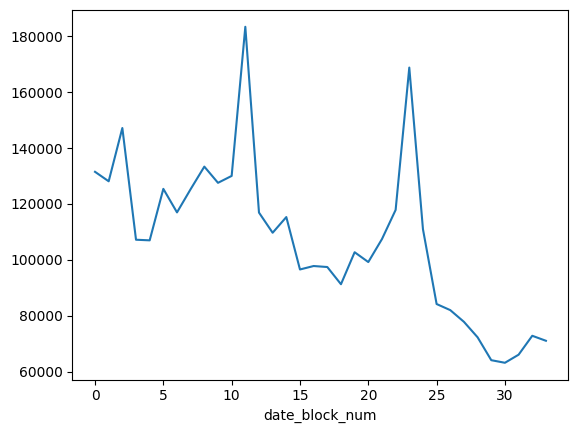

In [86]:
sales_by_month = train_df.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_by_month.plot()

By looking at the plot above we can say that the sale is decreasing over months. However, some peaks are spotted during November.

# checking for correlation¶
there are no noticeably strong pos/neg correlation in sight

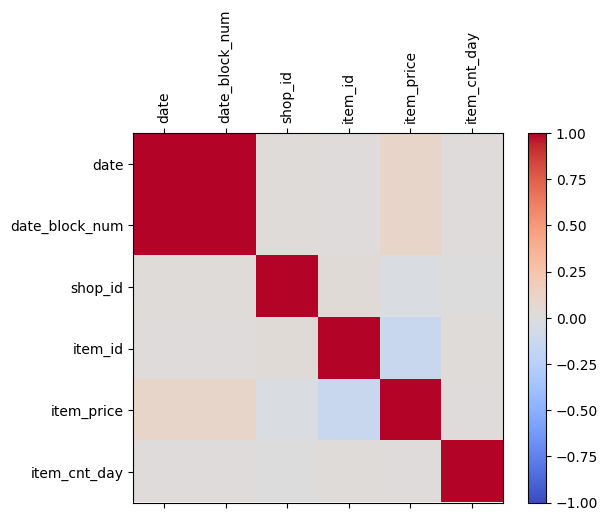

In [90]:
import matplotlib.pyplot as plt 
corr = train_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_df.columns)
ax.set_yticklabels(train_df.columns)
plt.show()

# Checking how many items sold per category

In [92]:
df_items2.head()

,item_name,item_id,item_category_id,item_name.1
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Item_00001
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Item_00002
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Item_00003
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Item_00004
4,***КОРОБКА (СТЕКЛО) D,4,40,Item_00005


In [93]:
df_items3=df_items2.copy()

In [96]:
df_items3=df_items3.drop(columns=['item_name'])


In [97]:
df_items3.head()

,item_id,item_category_id,item_name.1
0,0,40,Item_00001
1,1,76,Item_00002
2,2,40,Item_00003
3,3,40,Item_00004
4,4,40,Item_00005


In [98]:
df_items3=df_items3.rename(columns={'item_name.1': 'item_names'})

In [99]:
df_items3.head()

,item_id,item_category_id,item_names
0,0,40,Item_00001
1,1,76,Item_00002
2,2,40,Item_00003
3,3,40,Item_00004
4,4,40,Item_00005


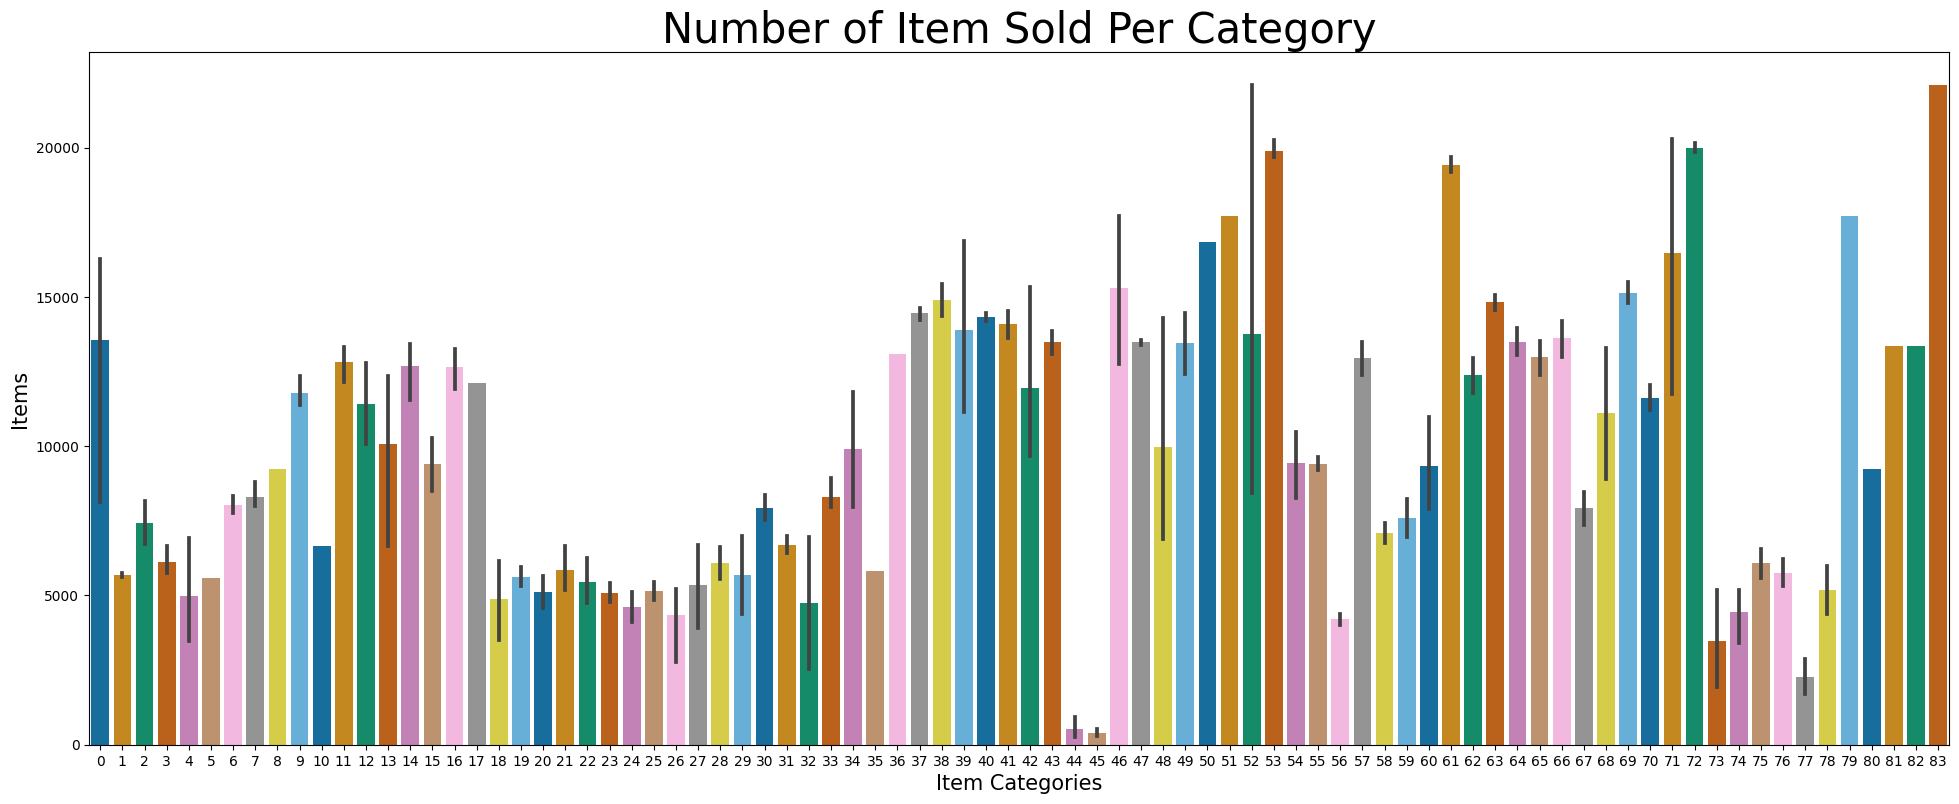

In [103]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(x='item_category_id', y='item_id', data=df_items3, palette='colorblind')
plt.title('Number of Item Sold Per Category', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items', fontsize = 15)
plt.show()

# Checking how many items sold per per month i.e. (jan 2013 ~ Oct 2015)¶

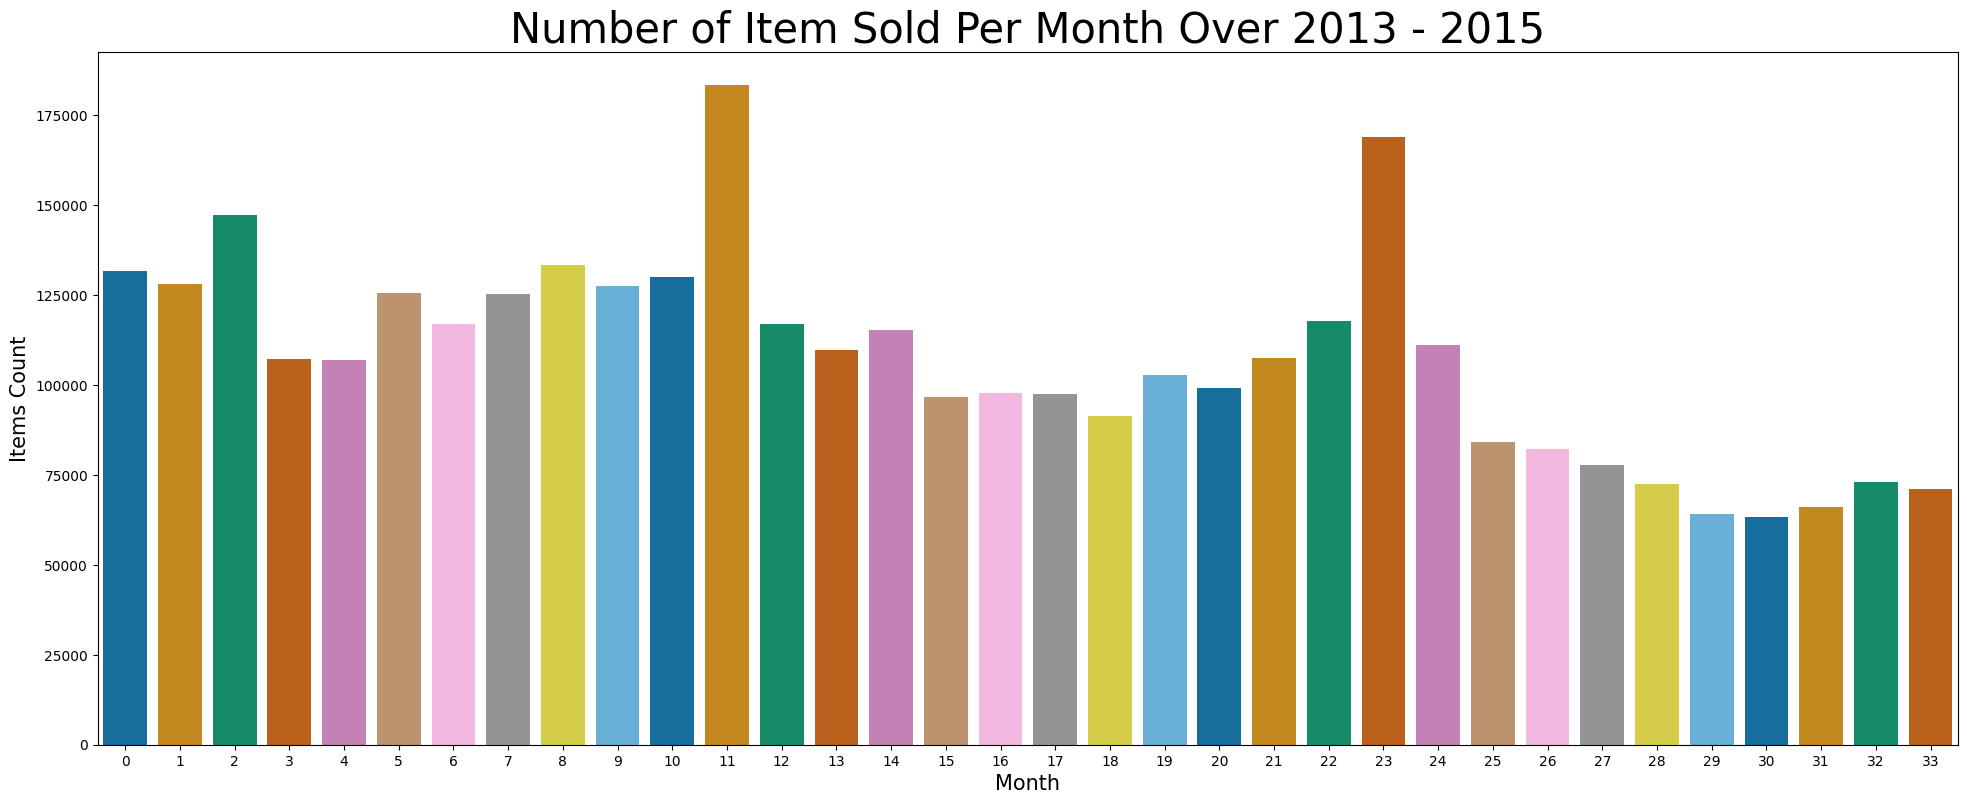

In [110]:
sales_by_month = train_df.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index()
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(x='date_block_num',y='item_cnt_day',data=sales_by_month, palette = 'colorblind')
plt.title('Number of Item Sold Per Month Over 2013 - 2015', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Items Count', fontsize = 15)
plt.show()

checking the number of unique snop names and item category names

In [111]:
df_item_category2.head()

,item_category_name,item_category_id,Category_name
0,PC - Гарнитуры/Наушники,0,Ladies' Apparel
1,Аксессуары - PS2,1,Men's Apparel
2,Аксессуары - PS3,2,Kids' Apparel
3,Аксессуары - PS4,3,Plus Sizes
4,Аксессуары - PSP,4,Maternity


In [113]:
df_item_category2=df_item_category2.drop(columns=['item_category_name'])
df_item_category2.head()

,item_category_id,Category_name
0,0,Ladies' Apparel
1,1,Men's Apparel
2,2,Kids' Apparel
3,3,Plus Sizes
4,4,Maternity


In [114]:
df_shops2=pd.read_csv(r"C:\Users\mahis\Downloads\competitive-data-science-predict-future-sales\shop2.csv")

In [115]:
df_shops2.head()

,shop_name,shop_id,shop_names
0,"!Якутск Орджоникидзе, 56 фран",0,"Houston, TX"
1,"!Якутск ТЦ ""Центральный"" фран",1,"Miami, FL"
2,"Адыгея ТЦ ""Мега""",2,"San Antonio, TX"
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Orlando, FL"
4,"Волжский ТЦ ""Волга Молл""",4,"Kissimmee, FL"


In [116]:
df_shops2=df_shops2.drop(columns=['shop_name'])
df_shops2.head()

,shop_id,shop_names
0,0,"Houston, TX"
1,1,"Miami, FL"
2,2,"San Antonio, TX"
3,3,"Orlando, FL"
4,4,"Kissimmee, FL"


In [117]:
# item_cat['item_category_name'].count()
print(df_item_category2['Category_name'].nunique())
print(df_shops2['shop_names'].nunique())

84
60


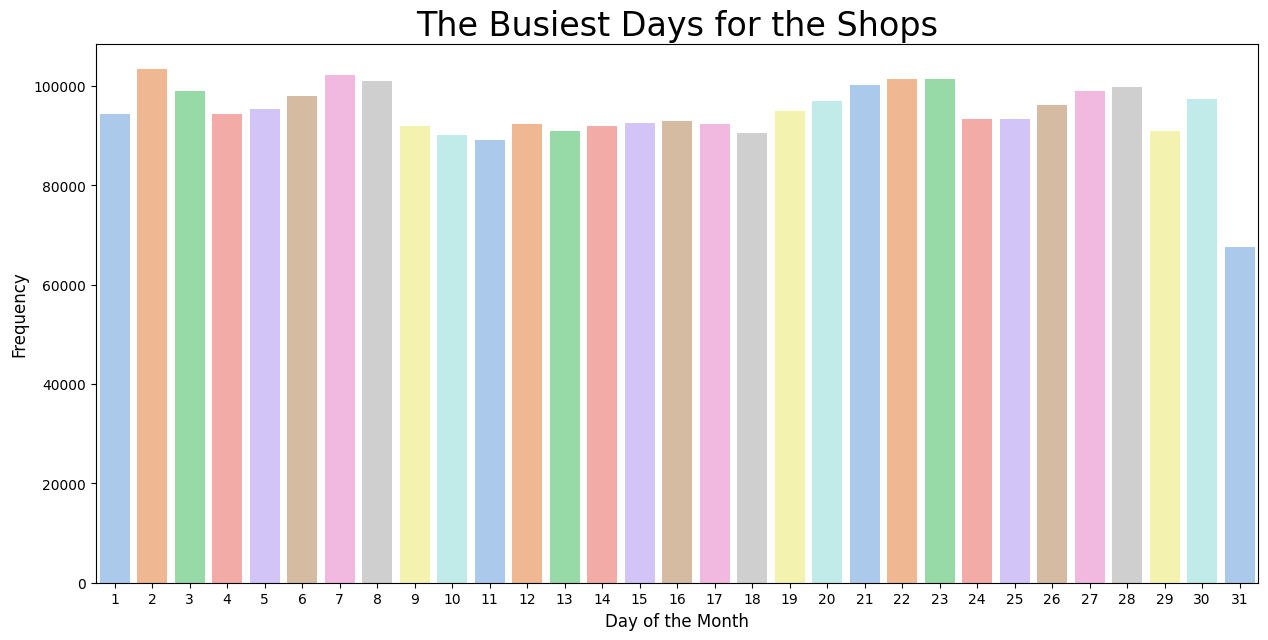

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract day, month, year
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

# Count frequency of each day (1 to 31)
day_counts = train_df['day'].value_counts().sort_index()

# Convert to DataFrame for plotting
days_df = pd.DataFrame({
    'day': day_counts.index,
    'frequency': day_counts.values
})

# Plot
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x='day', y='frequency', data=days_df, palette='pastel')
plt.title('The Busiest Days for the Shops', fontsize=24)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()


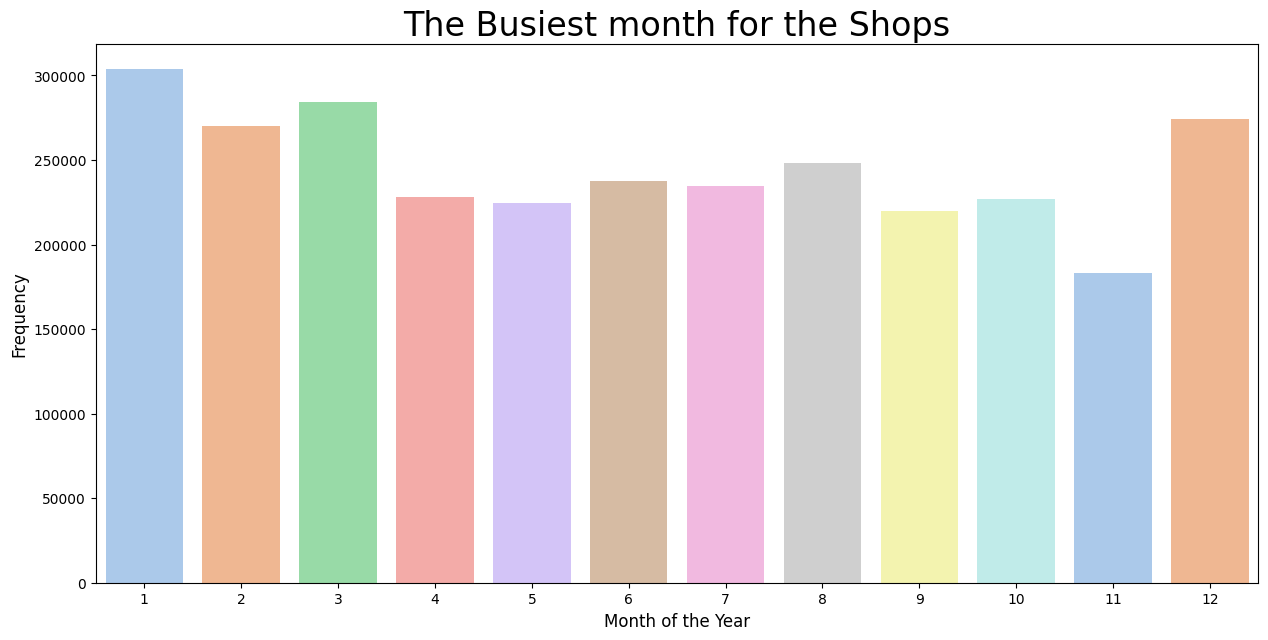

In [132]:
 #Count frequency of each month (1 to 12)
month_counts = train_df['month'].value_counts().sort_index()

# Convert to DataFrame for plotting
months_df = pd.DataFrame({
    'month': month_counts.index,
    'frequency': month_counts.values
})

# Plot
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x='month', y='frequency', data=months_df, palette='pastel')
plt.title('The Busiest month for the Shops', fontsize=24)
plt.xlabel('Month of the Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Busiest months and years for shops

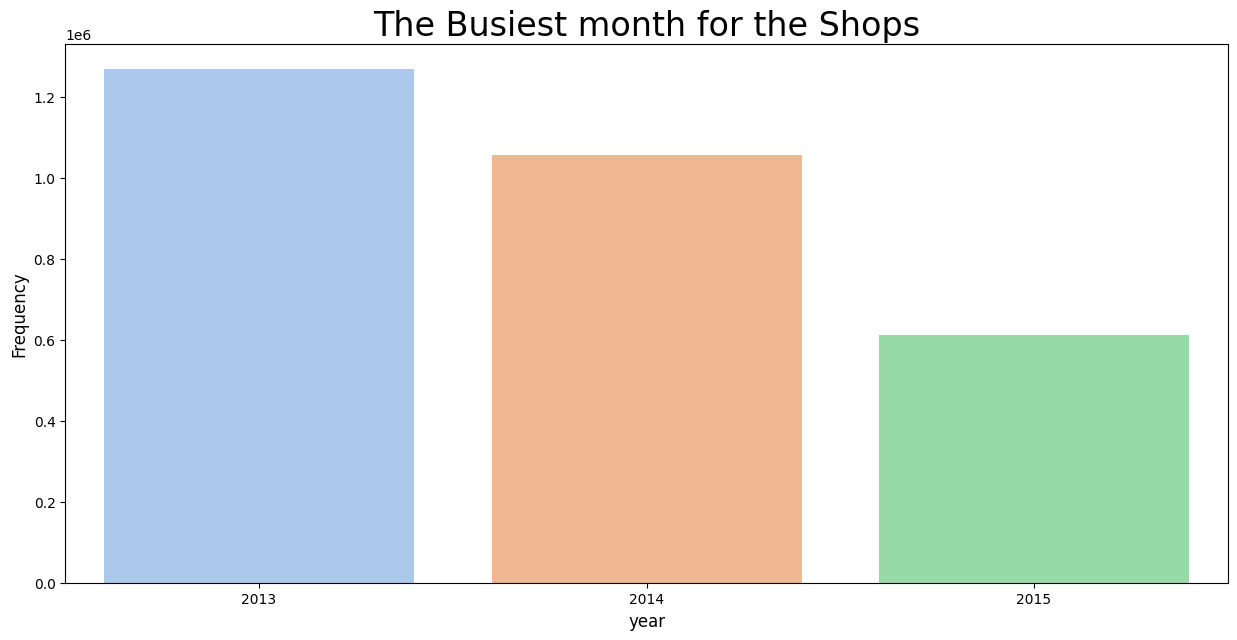

In [134]:
#Count frequency of each month (1 to 12)
year_counts = train_df['year'].value_counts().sort_index()

# Convert to DataFrame for plotting
year_df = pd.DataFrame({
    'year': year_counts.index,
    'frequency': year_counts.values
})

# Plot
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x='year', y='frequency', data=year_df, palette='pastel')
plt.title('The Busiest month for the Shops', fontsize=24)
plt.xlabel('year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [135]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013


# Outliers

In [136]:
train_df.describe()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,2014-04-03 05:44:34.970681344,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.585267e+01,6.247717e+00,2.013777e+03
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,1.000000e+00,1.000000e+00,2.013000e+03
25%,2013-08-01 00:00:00,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,8.000000e+00,3.000000e+00,2.013000e+03
50%,2014-03-04 00:00:00,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,1.600000e+01,6.000000e+00,2.014000e+03
75%,2014-12-05 00:00:00,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.400000e+01,9.000000e+00,2.014000e+03
max,2015-10-31 00:00:00,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,3.100000e+01,1.200000e+01,2.015000e+03
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,8.923483e+00,3.536219e+00,7.684790e-01


from the description above, when we look at the max and min values we can see that there is an outlier for item_price and item_cnt_day

# Below we plot the outliers¶
this kernel has helped me understand this concept.

<Axes: xlabel='item_price'>

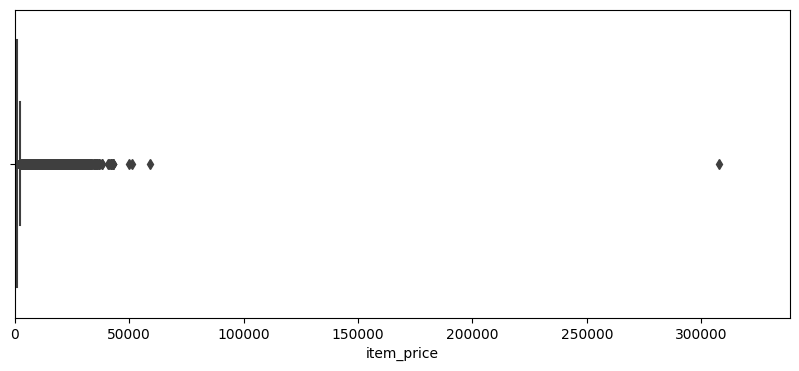

In [138]:
plt.figure(figsize=(10,4))
plt.xlim(train_df.item_price.min(), train_df.item_price.max()*1.1)
sns.boxplot(x=train_df.item_price)

<Axes: xlabel='item_cnt_day'>

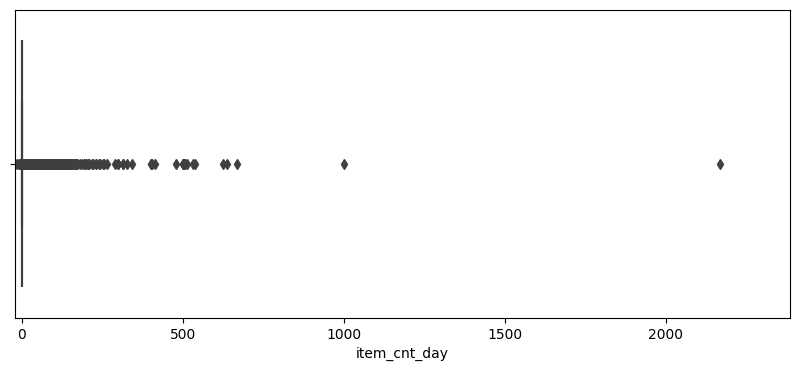

In [139]:
plt.figure(figsize=(10,4))
plt.xlim(train_df.item_cnt_day.min(), train_df.item_cnt_day.max()*1.1)
sns.boxplot(x=train_df.item_cnt_day)

By judging from the above outlier diagram above we see a price point further than the other points. So we can get rid of that point.

Also for item_cnt_day there is a point further than other point we will get rid of that point too.

The demonstration has been shown below:

In [140]:
train_df = train_df[train_df['item_price'] < 100000]
train_df = train_df[train_df['item_cnt_day'] < 1200]

In [142]:
train_df.shape

(2935847, 9)

Also, from the diagram we can see that there is a price point that is less than zero. We will fill that price with median value.

In [143]:
train_df[train_df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
484683,2013-05-15,4,32,2973,-1.0,1.0,15,5,2013


In [144]:
median = train_df[(train_df.shop_id==32)&(train_df.item_id==2973)&(train_df.date_block_num==4)&(train_df.item_price>0)].item_price.median()
median

1874.0

After assigning the median value we can no longer find any record with negative pricing.

In [145]:
train_df["item_price"] = train_df["item_price"].map(lambda x: median if x<0 else x)

No item_price less than 0 remaining



In [147]:
train_df[train_df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year


We can also see from the (2nd outlier)item_cnt_day diagram that there are some negative values.

In [148]:
train_df[train_df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
2,2013-01-05,0,25,2552,899.0,-1.0,5,1,2013
148,2013-01-23,0,25,2321,999.0,-1.0,23,1,2013
175,2013-01-07,0,25,2199,1449.0,-1.0,7,1,2013
807,2013-01-02,0,25,2330,599.0,-1.0,2,1,2013
1041,2013-01-13,0,25,5034,1989.0,-1.0,13,1,2013
...,...,...,...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0,26,10,2015
2934462,2015-10-18,33,25,4896,6398.0,-1.0,18,10,2015
2935263,2015-10-05,33,25,10039,249.0,-1.0,5,10,2015
2935643,2015-10-16,33,25,7893,2990.0,-1.0,16,10,2015


item_cnt_day < 0 or -1 probably means that those items were returned. If the Items are returned then there are no sales involved as well. So, we can get rid of negative values and set it as 0.

In [149]:
train_df["item_cnt_day"] = train_df["item_cnt_day"].map(lambda x: 0 if x<0 else x)

no < 0 item_cnt_day value remaining

In [150]:
train_df[train_df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year


# Data Preprocessing

In [151]:
train_df.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.0,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.0,1.0,3,1,2013


checking to see if all shop_id and item_id from test dataset is also present in the train dataset

In [152]:
print("total unique items: ", df_items3['item_id'].nunique())
print("total unique items in train dataset: ", train_df['item_id'].nunique())
print("total unique items in test dataset: ", df_test['item_id'].nunique())

print("total unique shops: ", df_shops2['shop_id'].nunique())
print("total unique shops in train dataset: ", train_df['shop_id'].nunique())
print("total unique shops in test dataset: ", df_test['shop_id'].nunique())

total unique items:  22170
total unique items in train dataset:  21806
total unique items in test dataset:  5100
total unique shops:  60
total unique shops in train dataset:  60
total unique shops in test dataset:  42


we can see that item numbers in test and train sets are not equal. So making prediction for the missing items is going to be difficult.

Lets find out which item_ids are in test_set but not in train_set

363 items are not found in train_dataset so predicting sales for these items is not easy since we do not have the prices for these items.

In [153]:
test_item_list = [x for x in (np.unique(df_test['item_id']))]
train_item_list = [x for x in (np.unique(train_df['item_id']))]

missing_item_ids_ = [element for element in test_item_list if element not in train_item_list]
len(missing_item_ids_)

363

In [154]:
df_shops2

,shop_id,shop_names
0,0,"Houston, TX"
1,1,"Miami, FL"
2,2,"San Antonio, TX"
3,3,"Orlando, FL"
4,4,"Kissimmee, FL"
5,5,"Phoenix, AZ"
6,6,"Philadelphia, PA"
7,7,"Las Vegas, NV"
8,8,"Chicago, IL"
9,9,"New York, NY"


In [155]:
# Split the 'shop_names' column into city and state
df_shops2[['shop_city', 'shop_state']] = df_shops2['shop_names'].str.split(', ', expand=True)

In [156]:
df_shops2

,shop_id,shop_names,shop_city,shop_state
0,0,"Houston, TX",Houston,TX
1,1,"Miami, FL",Miami,FL
2,2,"San Antonio, TX",San Antonio,TX
3,3,"Orlando, FL",Orlando,FL
4,4,"Kissimmee, FL",Kissimmee,FL
5,5,"Phoenix, AZ",Phoenix,AZ
6,6,"Philadelphia, PA",Philadelphia,PA
7,7,"Las Vegas, NV",Las Vegas,NV
8,8,"Chicago, IL",Chicago,IL
9,9,"New York, NY",New York,NY


In [157]:
# Assign unique city codes
df_shops2['city_code'] = pd.factorize(df_shops2['shop_city'])[0]


In [158]:
df_shops2

,shop_id,shop_names,shop_city,shop_state,city_code
0,0,"Houston, TX",Houston,TX,0
1,1,"Miami, FL",Miami,FL,1
2,2,"San Antonio, TX",San Antonio,TX,2
3,3,"Orlando, FL",Orlando,FL,3
4,4,"Kissimmee, FL",Kissimmee,FL,4
5,5,"Phoenix, AZ",Phoenix,AZ,5
6,6,"Philadelphia, PA",Philadelphia,PA,6
7,7,"Las Vegas, NV",Las Vegas,NV,7
8,8,"Chicago, IL",Chicago,IL,8
9,9,"New York, NY",New York,NY,9


lets add few more features to our shop dataset like below:

"num_products"
"min_price"
"max_price"
"mean_price"

In [159]:
for shop_id in df_shops2['shop_id'].unique():
    df_shops2.loc[shop_id, 'num_products'] = train_df[train_df['shop_id'] == shop_id]['item_id'].nunique()
    df_shops2.loc[shop_id, 'min_price'] = train_df[train_df['shop_id'] == shop_id]['item_price'].min()
    df_shops2.loc[shop_id, 'max_price'] = train_df[train_df['shop_id'] == shop_id]['item_price'].max()
    df_shops2.loc[shop_id, 'mean_price'] = train_df[train_df['shop_id'] == shop_id]['item_price'].mean()

In [160]:
df_shops2

,shop_id,shop_names,shop_city,shop_state,city_code,num_products,min_price,max_price,mean_price
0,0,"Houston, TX",Houston,TX,0,3600.0,13.000000,15653.0,563.444151
1,1,"Miami, FL",Miami,FL,1,2523.0,13.000000,15653.0,515.350652
2,2,"San Antonio, TX",San Antonio,TX,2,4849.0,0.100000,34990.0,1350.638391
3,3,"Orlando, FL",Orlando,FL,3,5261.0,0.100000,42990.0,1036.840634
4,4,"Kissimmee, FL",Kissimmee,FL,4,7309.0,0.100000,34990.0,923.994318
5,5,"Phoenix, AZ",Phoenix,AZ,5,7084.0,0.100000,36990.0,871.182496
6,6,"Philadelphia, PA",Philadelphia,PA,6,11856.0,0.070000,34990.0,901.955104
7,7,"Las Vegas, NV",Las Vegas,NV,7,8246.0,0.100000,35990.0,965.581388
8,8,"Chicago, IL",Chicago,IL,8,1909.0,14.000000,15990.0,652.483208
9,9,"New York, NY",New York,NY,9,1404.0,90.000000,27499.0,1256.812248


# Processing Item Category data¶
The Item category name is designed like below:

Item category name = type of the category + sub types
for example: an item category name Служебные - Билеты is tranlated as Service - Tickets

where the type of this category is Service and subtype is Tickets (what kind of service)..

we will now add these new features to our dataset

In [163]:
df_item_category2.head(20)

,item_category_id,Category_name
0,0,Ladies' Apparel
1,1,Men's Apparel
2,2,Kids' Apparel
3,3,Plus Sizes
4,4,Maternity
5,5,Activewear
6,6,Outerwear
7,7,Swimwear
8,8,Sleepwear
9,9,Suits & Blazers


# Preparing our final DF
We will also prepare our train and test datasets.

Now we will split train_dataset into train_set and validation_set.

In [168]:
train_df.rename(columns={"item_cnt_month": "item_cnt_day"}, inplace=True)

In [169]:
train_df = train_df[train_df["item_cnt_day"]>0]
train_df = train_df[["month", "date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day"]].groupby(
    ["date_block_num", "shop_id", "item_id"]).agg(
    {"item_price": "mean","item_cnt_day": "sum", "month": "min"}).reset_index()
train_df.rename(columns={"item_cnt_day": "item_cnt_month"}, inplace=True)
train_df = pd.merge(train_df, df_items3, on="item_id", how="inner")
train_df = pd.merge(train_df, df_shops2, on="shop_id", how="inner")
train_df = pd.merge(train_df, df_item_category2, on="item_category_id", how="inner")

In [174]:
train_df.head(2)

,date_block_num,shop_id,item_id,item_price,item_cnt_month,month,item_category_id,item_names,shop_names,shop_city,shop_state,city_code,num_products,min_price,max_price,mean_price,Category_name
0,0,0,32,221.0,6.0,1,40,Item_00033,"Houston, TX",Houston,TX,0,3600.0,13.0,15653.0,563.444151,Curtains
1,0,0,33,347.0,3.0,1,37,Item_00034,"Houston, TX",Houston,TX,0,3600.0,13.0,15653.0,563.444151,Furniture


In [175]:
train_df.drop(['item_names', 'shop_names', 'shop_city','shop_state', 'Category_name'], axis = 1, inplace=True)

In [176]:
train_df.head(2)

,date_block_num,shop_id,item_id,item_price,item_cnt_month,month,item_category_id,city_code,num_products,min_price,max_price,mean_price
0,0,0,32,221.0,6.0,1,40,0,3600.0,13.0,15653.0,563.444151
1,0,0,33,347.0,3.0,1,37,0,3600.0,13.0,15653.0,563.444151


In [177]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [179]:
df_test.shape

(214200, 3)

In [178]:
train_df = train_df[train_df['shop_id'].isin(df_test['shop_id'].unique())]
train_df = train_df[train_df['item_id'].isin(df_test['item_id'].unique())]

In [180]:
train_df.shape

(599912, 12)

In [182]:
# final_train_df = train_df[['date_block_num','item_id','shop_id','item_cnt_month']]
final_train_df = train_df.copy()
final_train_df = final_train_df.pivot_table(index=['item_id','shop_id'], columns = 'date_block_num', values = 'item_cnt_month', fill_value = 0).reset_index()

final_train_df = pd.merge(df_test,final_train_df,on = ['item_id','shop_id'],how = 'left')
final_train_df.fillna(0,inplace = True)
final_train_df

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
final_train_df.shape

(214200, 37)

In [184]:
final_train_df.columns

Index([     'ID', 'shop_id', 'item_id',         0,         1,         2,
               3,         4,         5,         6,         7,         8,
               9,        10,        11,        12,        13,        14,
              15,        16,        17,        18,        19,        20,
              21,        22,        23,        24,        25,        26,
              27,        28,        29,        30,        31,        32,
              33],
      dtype='object')

In [185]:
final_train_df[34] = 0
final_train_df

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,34
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [186]:
final_train_df = final_train_df.drop(34, axis = 1)
final_train_df

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Creation¶

In [188]:
x_train = final_train_df.drop(33, axis=1)
y_train = final_train_df[33]
# x_valid = train_dataset[train_dataset.date_block_num == 33].drop(['item_cnt_month'], axis=1)
# y_valid = train_dataset[train_dataset.date_block_num == 33]['item_cnt_month']
# deleting the column so that it can predict the future sales data
x_test = final_train_df.drop(0, axis=1)

In [189]:
print(x_train.shape, y_train.shape, x_test.shape)

(214200, 36) (214200,) (214200, 36)


In [190]:
x_test

,ID,shop_id,item_id,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
